In [1]:
from google.cloud import bigquery

In [2]:
!gcloud auth login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Qg4CTxegfXW192N9ChOo8ek9JQG5WN&access_type=offline&code_challenge=_FXjqHzlLBsJhXDiF5hFUsq1pvb7igsCaDoFWMehNC4&code_challenge_method=S256


You are now logged in as [iwama_yuki@retail-ai.jp].
Your current project is [inunaki].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import datetime as dt
import db_dtypes
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

In [4]:
%load_ext google.cloud.bigquery

## 適正在庫・フェイス数算出

### 棚情報

In [38]:
%%bigquery df_shelf

SELECT 
  w.yw
  ,w.store_cd
  ,b.store_name
  ,w.shelf_cd
  ,n.shelf_name
  ,w.level
  ,w.column
  ,w.face_cnt
  ,w.max_display_cnt
  ,w.max_display_cnt/w.face_cnt as stock_per_face
  ,w.jan
  ,p.div
  ,p.product_name
  ,p.category
  ,p.subcategory
FROM `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_week` as w
LEFT JOIN `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_name_week` as n
ON w.yw = n.yw
AND w.store_cd = n.store_cd
AND w.shelf_cd = n.shelf_cd
LEFT JOIN `inunaki.dim_org_0001.dim_branches`　as b
ON w.store_cd = b.store_cd
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON w.jan = p.jan
WHERE w.yw = 202321
AND p.div = "飲料"
AND w.store_cd = 562
AND n.shelf_name = "冷蔵ケース（飲料）"

Downloading: 100%|████████████████████████████| 77/77 [00:01<00:00, 58.97rows/s]


In [39]:
df_shelf

,yw,store_cd,store_name,shelf_cd,shelf_name,level,column,face_cnt,max_display_cnt,stock_per_face,jan,div,product_name,category,subcategory
0,202321,562,今泉2丁目店,53008,冷蔵ケース（飲料）,5,40,1.000000000,4.000000000,4.000000000,00000004514603391510,飲料,ウィルキンソンタンサンレモン1L,大型PET（炭酸水）,炭酸水（フレーバー）
1,202321,562,今泉2丁目店,53008,冷蔵ケース（飲料）,5,30,2.000000000,8.000000000,4.000000000,00000004514603326017,飲料,ウィルキンソンタンサン1L,大型PET（炭酸水）,炭酸水
2,202321,562,今泉2丁目店,53007,冷蔵ケース（飲料）,3,10,2.000000000,10.000000000,5.000000000,00000004901777380004,飲料,クラフトボスフルーツオレ500ml,乳性（小型PET）,乳性
3,202321,562,今泉2丁目店,53007,冷蔵ケース（飲料）,2,50,2.000000000,10.000000000,5.000000000,00000004902102149938,飲料,紅茶花伝クラフティー白ぶどうフルーツティー440ml,紅茶（小型PET）,その他フレーバー
4,202321,562,今泉2丁目店,53006,冷蔵ケース（飲料）,2,40,2.000000000,10.000000000,5.000000000,00000004909411090166,飲料,生茶免疫ケア525ml,無糖茶（小型PET）,緑茶
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,202321,562,今泉2丁目店,53005,冷蔵ケース（飲料）,4,10,4.000000000,24.000000000,6.000000000,00000004902102137065,飲料,コカ・コーラ350ml,炭酸（小型PET）,コーラ炭酸
73,202321,562,今泉2丁目店,53006,冷蔵ケース（飲料）,4,20,4.000000000,24.000000000,6.000000000,00000004522646903447,飲料,国産茶葉100%濃い緑茶500ml,無糖茶（小型PET）,緑茶
74,202321,562,今泉2丁目店,53008,冷蔵ケース（飲料）,3,10,5.000000000,25.000000000,5.000000000,00000004909411089368,飲料,ファイアワンデイブラック600ml,コーヒー（小型PET）,無糖
75,202321,562,今泉2丁目店,53008,冷蔵ケース（飲料）,4,10,5.000000000,25.000000000,5.000000000,00000004514603325812,飲料,ウィルキンソンタンサン500ml,小型PET（炭酸水）,炭酸水


In [43]:
## 冷蔵ケースの現状のフェイス数を出す。
df_shelf["face_cnt"].astype(int).sum()

226

### 安全在庫を出すための集計

In [44]:
%%bigquery base_analysis

with imaizumi_base as
(
SELECT 
  w.yw
  ,w.store_cd
  ,b.store_name
  ,w.shelf_cd
  ,n.shelf_name
  ,w.level
  ,w.column
  ,w.face_cnt
  ,w.max_display_cnt
  ,w.max_display_cnt/w.face_cnt as stock_per_face
  ,w.jan
  ,p.div
  ,p.product_name
  ,p.category
  ,p.subcategory
FROM `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_week` as w
LEFT JOIN `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_name_week` as n
ON w.yw = n.yw
AND w.store_cd = n.store_cd
AND w.shelf_cd = n.shelf_cd
LEFT JOIN `inunaki.dim_org_0001.dim_branches`　as b
ON w.store_cd = b.store_cd
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON w.jan = p.jan
WHERE w.yw = 202321
AND p.div = "飲料"
AND w.store_cd = 562
AND n.shelf_name = "冷蔵ケース（飲料）"
)

,imaizumi_uriage_base as
(
SELECT
  d.salesday
  ,p.jan
  ,p.product_name
  ,sum(d.salescnt) as cnt
FROM `inunaki.dwd_idpos_0001.dwd_idpos_detail` as d
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON d.jan = p.jan
WHERE d.storecd = 562
AND d.salesday between "2023-03-24" and "2023-05-23"
AND p.product_name in (SELECT distinct product_name from imaizumi_base)
GROUP BY 1,2,3
QUALIFY ROW_NUMBER()over(partition by jan order by cnt DESC) <= 45　--売り切れの日を簡易的に除外
ORDER BY 3,1
)

,simple_describe as
(
SELECT
  jan
  ,product_name
  ,sum(cnt) as salescnt--適正フェイス数を計算する順番を決める
  ,STDDEV(cnt) as salescnt_std--安全在庫の計算に使う
FROM imaizumi_uriage_base
GROUP BY 1,2
ORDER BY 3 DESC
)

,two_days_sum as
(
SELECT
  jan
  ,product_name
  ,avg(salescnt_per_2days) as salescnt_per_2days--適正在庫の計算に使う
FROM
  (
  SELECT
    salesday
    ,jan
    ,product_name
    ,cnt
    ,CASE WHEN 2 = count(*)OVER(partition by jan ORDER BY salesday ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) 
      then sum(cnt) OVER(partition by jan ORDER BY salesday ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) 
      else null end as salescnt_per_2days
  FROM imaizumi_uriage_base
  ORDER BY 2,3,1
  )
GROUP BY 1,2
)

SELECT
  s.jan
  ,s.product_name
  ,s.salescnt--売上上位４５日間の合計売上数（適正フェイス数を計算する順番を決める）
  ,s.salescnt_std--売上上位４５日間の売上数の標準偏差（安全在庫の計算に使う）
  ,t.salescnt_per_2days--連続２日間の売上合計の平均（適正在庫の計算に使う）
  ,i.stock_per_face--１フェースあたりおける数量（適正フェイス数を決めるのに使う）
FROM simple_describe as s 
LEFT JOIN two_days_sum as t  
ON s.jan = t.jan
AND s.product_name = t.product_name
LEFT JOIN imaizumi_base as i  
ON s.jan = i.jan
AND s.product_name = i.product_name



Downloading: 100%|████████████████████████████| 76/76 [00:01<00:00, 73.72rows/s]


In [46]:
## 売上が多い順に抽出
base_analysis.sort_values("salescnt",ascending = False).head(10)

,jan,product_name,salescnt,salescnt_std,salescnt_per_2days,stock_per_face
5,00000004582482530450,霧島水源天然水500ml,916,8.028799,40.568182,5.000000000
65,00000004522646835915,鹿児島県産茶葉の緑茶500ml,514,9.389280,23.045455,6.000000000
15,00000004522646888324,天然水仕込み強炭酸水500ml,493,5.338350,22.045455,5.000000000
47,00000004514603325812,ウィルキンソンタンサン500ml,458,5.232281,20.454545,5.000000000
4,00000004514603422719,ドデカミン500ml,449,4.042327,20.000000,5.000000000
29,00000000000049104110,おいしい水天然水六甲シンプルecoラベル585ml,405,5.364022,17.931818,5.000000000
68,00000004522646888348,天然水仕込み強炭酸水レモン500ml,358,4.476989,15.954545,5.000000000
40,00000004901085002605,おーいお茶濃い茶600ml,334,3.236784,14.727273,5.000000000
67,00000004514603416619,ドトールブラック480ml,329,4.038577,14.750000,5.000000000
26,00000004514603416510,ドトールカフェオレ480ml,317,2.364083,14.068182,5.000000000


### 安全在庫と２日間売上平均から適正フェイス数を算出

In [47]:
%%bigquery df_appropriate_face

with imaizumi_base as
(
SELECT 
  w.yw
  ,w.store_cd
  ,b.store_name
  ,w.shelf_cd
  ,n.shelf_name
  ,w.level
  ,w.column
  ,w.face_cnt
  ,w.max_display_cnt
  ,w.max_display_cnt/w.face_cnt as stock_per_face
  ,w.jan
  ,p.div
  ,p.product_name
  ,p.category
  ,p.subcategory
FROM `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_week` as w
LEFT JOIN `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_name_week` as n
ON w.yw = n.yw
AND w.store_cd = n.store_cd
AND w.shelf_cd = n.shelf_cd
LEFT JOIN `inunaki.dim_org_0001.dim_branches`　as b
ON w.store_cd = b.store_cd
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON w.jan = p.jan
WHERE w.yw = 202321
AND p.div = "飲料"
AND w.store_cd = 562
AND n.shelf_name = "冷蔵ケース（飲料）"
)

,imaizumi_uriage_base as
(
SELECT
  d.salesday
  ,p.jan
  ,p.product_name
  ,sum(d.salescnt) as cnt
FROM `inunaki.dwd_idpos_0001.dwd_idpos_detail` as d
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON d.jan = p.jan
WHERE d.storecd = 562
AND d.salesday between "2023-03-24" and "2023-05-23"
AND p.product_name in (SELECT distinct product_name from imaizumi_base)
GROUP BY 1,2,3
QUALIFY ROW_NUMBER()over(partition by jan order by cnt DESC) <= 45　--売り切れの日を簡易的に除外
ORDER BY 3,1
)

,simple_describe as
(
SELECT
  jan
  ,product_name
  ,sum(cnt) as salescnt--適正フェイス数を計算する順番を決める
  ,STDDEV(cnt) as salescnt_std--安全在庫の計算に使う
FROM imaizumi_uriage_base
GROUP BY 1,2
ORDER BY 3 DESC
)

,two_days_sum as
(
SELECT
  jan
  ,product_name
  ,avg(salescnt_per_2days) as salescnt_per_2days--適正在庫の計算に使う
FROM
  (
  SELECT
    salesday
    ,jan
    ,product_name
    ,cnt
    ,CASE WHEN 2 = count(*)OVER(partition by jan ORDER BY salesday ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) 
      then sum(cnt) OVER(partition by jan ORDER BY salesday ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) 
      else null end as salescnt_per_2days
  FROM imaizumi_uriage_base
  ORDER BY 2,3,1
  )
GROUP BY 1,2
)

,basic_data as
(
SELECT
  s.jan
  ,s.product_name
  ,s.salescnt--売上上位４５日間の合計売上数（適正フェイス数を計算する順番を決める）
  ,s.salescnt_std--売上上位４５日間の売上数の標準偏差（安全在庫の計算に使う）
  ,t.salescnt_per_2days--連続２日間の売上合計の平均（適正在庫の計算に使う）
  ,i.stock_per_face--１フェースあたりおける数量（適正フェイス数を決めるのに使う）
  ,1.65 * s.salescnt_std * SQRT(2) as safety_stock--安全在庫の計算（欠品許容率5%,発注リードタイム2日を想定）
FROM simple_describe as s 
LEFT JOIN two_days_sum as t  
ON s.jan = t.jan
AND s.product_name = t.product_name
LEFT JOIN imaizumi_base as i  
ON s.jan = i.jan
AND s.product_name = i.product_name
)

SELECT
　　　　*
　　　　,salescnt_per_2days + safety_stock as appropriate_stock
　　　　,GREATEST(IFNULL(CEILING(SAFE_DIVIDE((salescnt_per_2days + safety_stock),stock_per_face)),0),2) as appropriate_face_tmp--最小のフェイス数を2とする。
FROM basic_data 




Downloading: 100%|████████████████████████████| 76/76 [00:01<00:00, 59.32rows/s]


In [50]:
df_appropriate_face.sort_values("salescnt",ascending = False).head(10)

,jan,product_name,salescnt,salescnt_std,salescnt_per_2days,stock_per_face,safety_stock,appropriate_stock,appropriate_face_tmp
49,00000004582482530450,霧島水源天然水500ml,916,8.028799,40.568182,5.000000000,18.734821,59.303002,12.0
65,00000004522646835915,鹿児島県産茶葉の緑茶500ml,514,9.389280,23.045455,6.000000000,21.909439,44.954893,8.0
35,00000004522646888324,天然水仕込み強炭酸水500ml,493,5.338350,22.045455,5.000000000,12.456785,34.502240,7.0
43,00000004514603325812,ウィルキンソンタンサン500ml,458,5.232281,20.454545,5.000000000,12.209279,32.663825,7.0
52,00000004514603422719,ドデカミン500ml,449,4.042327,20.000000,5.000000000,9.432577,29.432577,6.0
27,00000000000049104110,おいしい水天然水六甲シンプルecoラベル585ml,405,5.364022,17.931818,5.000000000,12.516689,30.448507,7.0
69,00000004522646888348,天然水仕込み強炭酸水レモン500ml,358,4.476989,15.954545,5.000000000,10.446842,26.401387,6.0
9,00000004901085002605,おーいお茶濃い茶600ml,334,3.236784,14.727273,5.000000000,7.552880,22.280153,5.0
70,00000004514603416619,ドトールブラック480ml,329,4.038577,14.750000,5.000000000,9.423826,24.173826,5.0
25,00000004514603416510,ドトールカフェオレ480ml,317,2.364083,14.068182,5.000000000,5.516475,19.584657,4.0


In [52]:
## 最小のフェイス数を2としている。
df_appropriate_face.sort_values("salescnt",ascending = False).tail(10)

,jan,product_name,salescnt,salescnt_std,salescnt_per_2days,stock_per_face,safety_stock,appropriate_stock,appropriate_face_tmp
75,00000004514603434712,三ツ矢特濃グレープスカッシュ500ml,46,1.907379,6.214286,5.000000000,4.450778,10.665064,3.0
8,00000004560292290375,レッドブルシュガーフリー250ml,40,0.508001,2.483871,7.000000000,1.185395,3.669266,2.0
28,00000004514603431018,バヤリースオレンジ470ml,40,0.963771,3.409091,5.000000000,2.248913,5.658004,2.0
26,00000004897036693889,モンスタースーパーコーラ355ml,34,0.417855,2.444444,6.000000000,0.975046,3.419490,2.0
32,00000004901340075542,愛媛県産河内晩柑&カルピス500ml,26,0.798809,3.500000,5.000000000,1.863982,5.363982,2.0
10,00000004897036693407,モンスターマンゴーロコ355ml,24,0.894427,3.000000,6.000000000,2.087103,5.087103,2.0
30,00000004901085634011,ごくごく飲める毎日1杯の青汁350g,22,0.427793,2.411765,6.000000000,0.998234,3.409998,2.0
16,00000004514603360912,ワンダ金の微糖185g,18,2.073644,7.250000,7.000000000,4.838750,12.088750,2.0
36,00000004514603416916,バヤリースオレンジ470ml,2,0.000000,2.000000,None,0.000000,2.000000,2.0
62,00000004514603436013,ウィルキンソンタンサンクラッシュグレープフルーツ500ml,1,NaN,NaN,5.000000000,NaN,NaN,2.0


### 最終的なフェイス数を出し、現状と比べる

In [53]:
%%bigquery df_final_shelf

--今泉２丁目店は3月25日から

with imaizumi_base as
(
SELECT 
  w.yw
  ,w.store_cd
  ,b.store_name
  ,w.shelf_cd
  ,n.shelf_name
  ,w.level
  ,w.column
  ,w.face_cnt
  ,w.max_display_cnt
  ,w.max_display_cnt/w.face_cnt as stock_per_face
  ,w.jan
  ,p.div
  ,p.product_name
  ,p.category
  ,p.subcategory
FROM `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_week` as w
LEFT JOIN `inunaki.dim_shelf_allocation_0001.dim_shelf_allocation_name_week` as n
ON w.yw = n.yw
AND w.store_cd = n.store_cd
AND w.shelf_cd = n.shelf_cd
LEFT JOIN `inunaki.dim_org_0001.dim_branches`　as b
ON w.store_cd = b.store_cd
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON w.jan = p.jan
WHERE w.yw = 202321
AND p.div = "飲料"
AND w.store_cd = 562
AND n.shelf_name = "冷蔵ケース（飲料）"
)

,imaizumi_uriage_base as
(
SELECT
  d.salesday
  ,p.jan
  ,p.product_name
  ,sum(d.salescnt) as cnt
FROM `inunaki.dwd_idpos_0001.dwd_idpos_detail` as d
LEFT JOIN `inunaki.dst_go.view_product_master` as p
ON d.jan = p.jan
WHERE d.storecd = 562
AND d.salesday between "2023-03-24" and "2023-05-23"
AND p.product_name in (SELECT distinct product_name from imaizumi_base)
GROUP BY 1,2,3
QUALIFY ROW_NUMBER()over(partition by jan order by cnt DESC) <= 45　--売り切れの日を簡易的に除外
ORDER BY 3,1
)

,simple_describe as
(
SELECT
  jan
  ,product_name
  ,sum(cnt) as salescnt--適正フェイス数を計算する順番を決める
  ,STDDEV(cnt) as salescnt_std--安全在庫の計算に使う
FROM imaizumi_uriage_base
GROUP BY 1,2
ORDER BY 3 DESC
)

,two_days_sum as
(
SELECT
  jan
  ,product_name
  ,avg(salescnt_per_2days) as salescnt_per_2days--適正在庫の計算に使う
FROM
  (
  SELECT
    salesday
    ,jan
    ,product_name
    ,cnt
    ,CASE WHEN 2 = count(*)OVER(partition by jan ORDER BY salesday ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) 
      then sum(cnt) OVER(partition by jan ORDER BY salesday ROWS BETWEEN 1 PRECEDING AND CURRENT ROW) 
      else null end as salescnt_per_2days
  FROM imaizumi_uriage_base
  ORDER BY 2,3,1
  )
GROUP BY 1,2
)

,basic_data as
(
SELECT
  s.jan
  ,s.product_name
  ,s.salescnt--売上上位４５日間の合計売上数（適正フェイス数を計算する順番を決める）
  ,s.salescnt_std--売上上位４５日間の売上数の標準偏差（安全在庫の計算に使う）
  ,t.salescnt_per_2days--連続２日間の売上合計の平均（適正在庫の計算に使う）
  ,i.stock_per_face--１フェースあたりおける数量（適正フェイス数を決めるのに使う）
  ,1.65 * s.salescnt_std * SQRT(2) as safety_stock--安全在庫の計算（欠品許容率5%,発注リードタイム2日を想定）
FROM simple_describe as s 
LEFT JOIN two_days_sum as t  
ON s.jan = t.jan
AND s.product_name = t.product_name
LEFT JOIN imaizumi_base as i  
ON s.jan = i.jan
AND s.product_name = i.product_name
)

,appropriate_face as
(
SELECT
  *
  ,sum(appropriate_face_tmp)OVER(ORDER BY salescnt DESC ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS acc_face
FROM
  (
  SELECT
    *
    ,salescnt_per_2days + safety_stock as appropriate_stock
    ,GREATEST(IFNULL(CEILING(SAFE_DIVIDE((salescnt_per_2days + safety_stock),stock_per_face)),0),2) as appropriate_face_tmp--最小のフェイス数を2とする。
  FROM basic_data 
  )
ORDER BY 3 DESC
)


SELECT
  a.*
  ,CASE WHEN acc_face > 226 then 0 else appropriate_face_tmp end as appropriate_face --棚割前のフェイス数を超えた場合フェイスを０とする
  ,i.face_cnt as real_face
FROM appropriate_face as a
LEFT JOIN imaizumi_base as i 
ON a.jan = i.jan
AND a.product_name = i.product_name
ORDER BY 3 DESC

Downloading: 100%|████████████████████████████| 76/76 [00:01<00:00, 73.31rows/s]


In [107]:
df_final_shelf.columns

Index(['jan', 'product_name', 'salescnt', 'salescnt_std', 'salescnt_per_2days',
       'stock_per_face', 'safety_stock', 'appropriate_stock',
       'appropriate_face_tmp', 'acc_face', 'appropriate_face', 'real_face'],
      dtype='object')

In [109]:
df_final_shelf_2 = df_final_shelf[["jan",'product_name', 'salescnt', 'salescnt_std',
                                   'appropriate_face', 'real_face','acc_face']]
df_final_shelf_2["appropriate_face"] = df_final_shelf_2["appropriate_face"].astype(int)
df_final_shelf_2["real_face"] = df_final_shelf_2["real_face"].fillna(0).astype(int)
df_final_shelf_2["acc_face"] = df_final_shelf_2["acc_face"].fillna(0).astype(int)

df_final_shelf_2.drop("acc_face",axis=1).sort_values("salescnt",ascending = False).head(20)

,jan,product_name,salescnt,salescnt_std,appropriate_face,real_face
0,00000004582482530450,霧島水源天然水500ml,916,8.028799,12,5
1,00000004522646835915,鹿児島県産茶葉の緑茶500ml,514,9.389280,8,4
2,00000004522646888324,天然水仕込み強炭酸水500ml,493,5.338350,7,4
3,00000004514603325812,ウィルキンソンタンサン500ml,458,5.232281,7,5
4,00000004514603422719,ドデカミン500ml,449,4.042327,6,3
5,00000000000049104110,おいしい水天然水六甲シンプルecoラベル585ml,405,5.364022,7,4
6,00000004522646888348,天然水仕込み強炭酸水レモン500ml,358,4.476989,6,4
7,00000004901085002605,おーいお茶濃い茶600ml,334,3.236784,5,4
8,00000004514603416619,ドトールブラック480ml,329,4.038577,5,4
9,00000004514603416510,ドトールカフェオレ480ml,317,2.364083,4,3


In [62]:
## 累積フェイス数が２２６を超えた場合、適正フェイス数をゼロとする。
df_final_shelf_2.sort_values("salescnt",ascending = False).tail(10)

,product_name,salescnt,salescnt_std,appropriate_face,real_face,acc_face
66,小岩井純水りんご430ml,46,0.800705,2,3,218
68,バヤリースオレンジ470ml,40,0.963771,2,3,220
67,レッドブルシュガーフリー250ml,40,0.508001,2,2,222
69,モンスタースーパーコーラ355ml,34,0.417855,2,2,224
70,愛媛県産河内晩柑&カルピス500ml,26,0.798809,2,3,226
71,モンスターマンゴーロコ355ml,24,0.894427,0,2,228
72,ごくごく飲める毎日1杯の青汁350g,22,0.427793,0,2,230
73,ワンダ金の微糖185g,18,2.073644,0,2,232
74,バヤリースオレンジ470ml,2,0.000000,0,0,234
75,ウィルキンソンタンサンクラッシュグレープフルーツ500ml,1,NaN,0,4,236


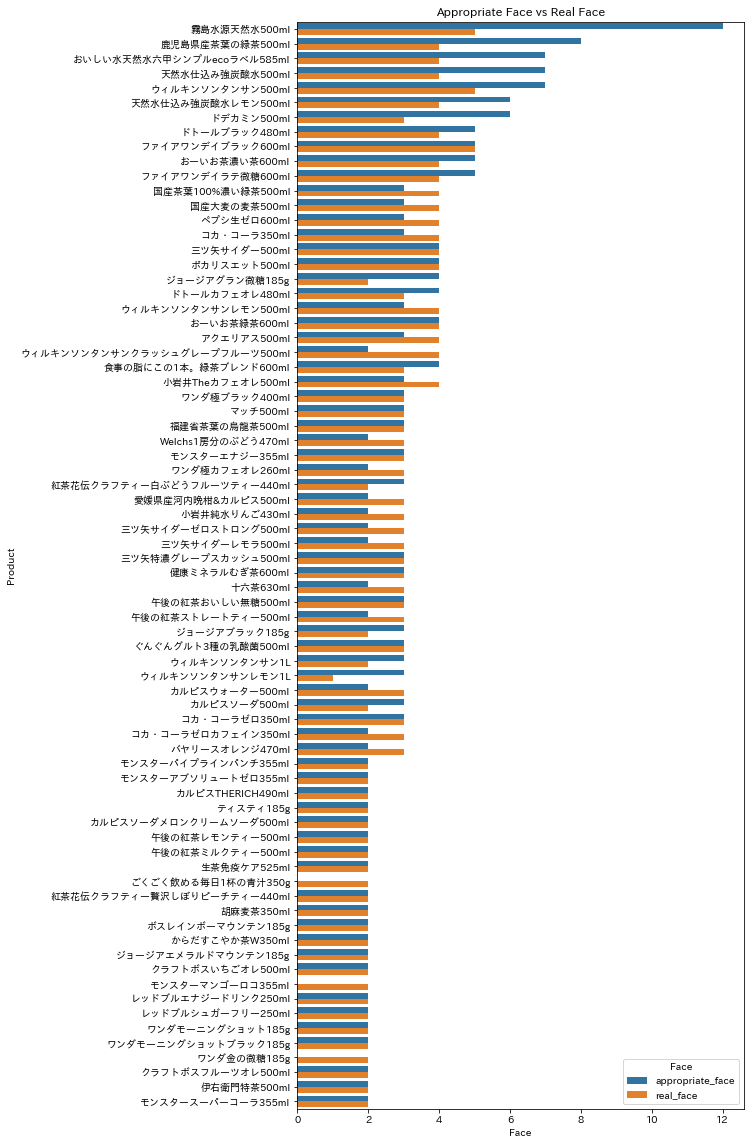

In [117]:
df_face = df_final_shelf_2.sort_values("salescnt",ascending = False).melt(id_vars='product_name', value_vars=['appropriate_face', 'real_face'], var_name='Face', value_name='Value')
df_face = df_face.groupby(["product_name","Face"])["Value"].sum().reset_index().sort_values("Value",ascending = False)

plt.figure(figsize=(8, 20))
sns.barplot(data=df_face, x='Value', y='product_name', hue='Face',ci=None)

# グラフの設定
plt.ylabel('Product')
plt.xlabel('Face')
plt.title('Appropriate Face vs Real Face')

# グラフを表示
plt.show()

## インターバル可視化

In [5]:
%%bigquery df_interval

SELECT
  DATETIME_DIFF(salestime,lag_salestime,hour) as interval_hour
  ,*
FROM
  (
  SELECT
    d.salestime
    ,lag(d.salestime)over(partition by p.product_name order by d.salestime) as lag_salestime
    ,p.jan
    ,p.product_name
    ,d.salescnt
  FROM `inunaki.dwd_idpos_0001.dwd_idpos_detail` as d
  LEFT JOIN `inunaki.dst_go.view_product_master` as p
  ON d.jan = p.jan
  WHERE d.storecd = 562
  AND d.salesday between "2023-03-24" and "2023-05-23"
  )
ORDER BY 4,2

Downloading: 100%|█████████████████| 224315/224315 [00:02<00:00, 92057.98rows/s]


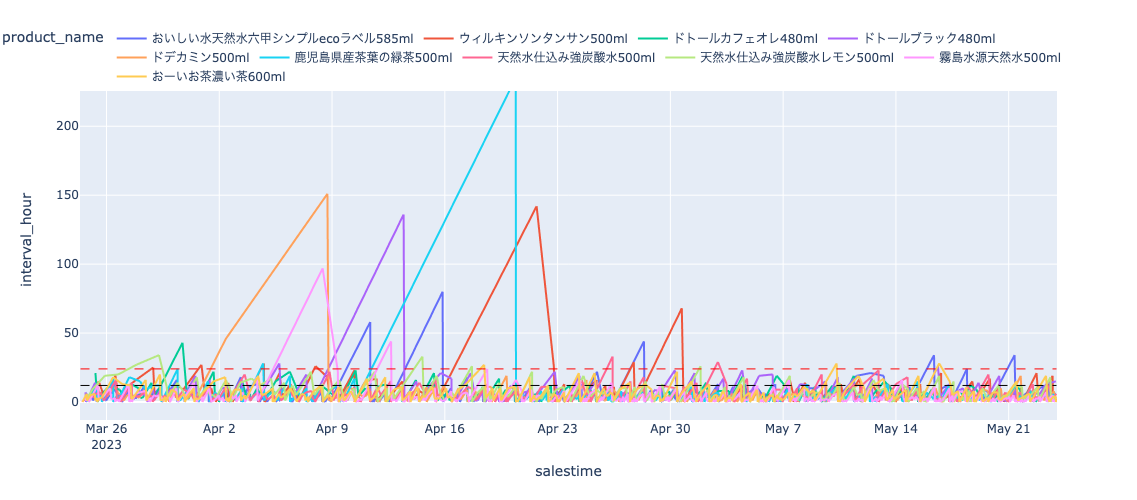

In [88]:
import plotly.graph_objects as go

top_list = list(df_final_shelf_2.sort_values("salescnt",ascending = False).head(10).product_name)
item_interval = df_interval[df_interval["product_name"].isin(top_list)]

# 折れ線グラフを作成
fig = px.line(item_interval, x='salestime', y='interval_hour', color='product_name')

# x軸に並行な黒の波線を追加
fig.add_shape(
    type='line',
    x0=item_interval['salestime'].min(),
    y0=24,
    x1=item_interval['salestime'].max(),
    y1=24,
    line=dict(
        color='red',
        width=1,
        dash='dash'
    )
)

fig.add_shape(
    type='line',
    x0=item_interval['salestime'].min(),
    y0=12,
    x1=item_interval['salestime'].max(),
    y1=12,
    line=dict(
        color='black',
        width=1,
        dash='dash'
    )
)

fig.update_layout(
    height=500,
    width=900,
    legend=dict(
        orientation='h',
        yanchor='top',
        y=1.1,
        xanchor='right',
        x=1
    )
)

fig.show()